# In this notebook I created a three layer deep neural network to classify neumerical data.

To apply a three layer neural network, we first need to preprocess the train and test data.

# Importing libraries

Necessary liabraries which will help us preprocess the train and test data are imported bellow.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

# Loading the Dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I loaded the train and test data in csv format from google drive with pandas.

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/trnData4D.csv',header = None)
test_data = pd.read_csv('/content/drive/MyDrive/tstData4D.csv',header = None)

# Checking the train an test data

We can see that both train and test data are four dimensional and contains 15000 examples each.

In [ ]:
train_data.shape

(15000, 4)

In [ ]:
test_data.shape

(15000, 4)

# Create training classes

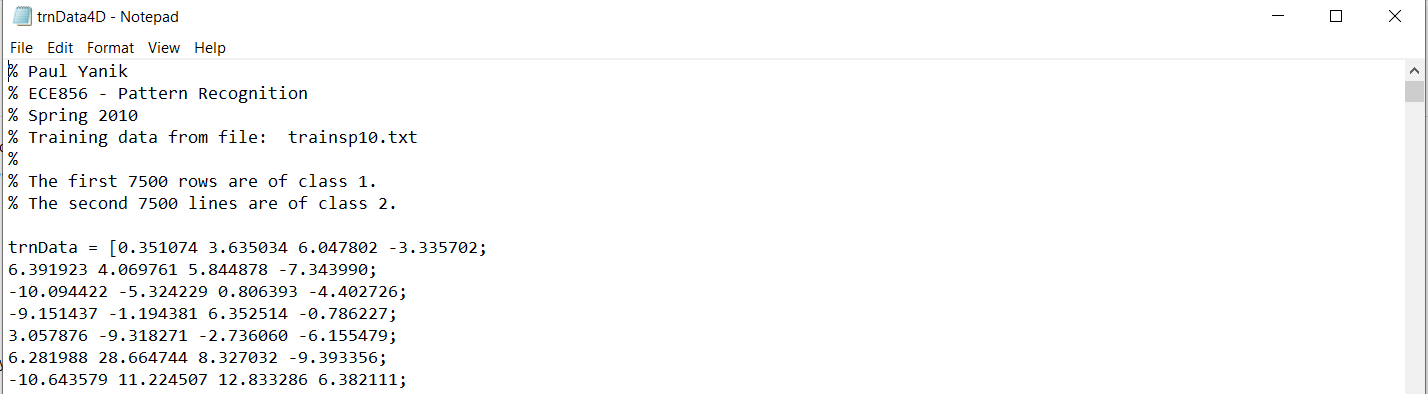



According to The training dataset matlab file in the figure above, the first 7500 rows are class 1 and the second 7500 rows are class 2. We need to create a new column **'class_name'** that labels first 7500 data as 0 (for class 1) and second 7500 data as 1 (for class 2).

In [ ]:
class_name = [i for i in range(1,15001) ] 
train_data['class_name'] = class_name
train_data['class_name'].iloc[0:7500] = 0  # data belong to class_1 is set to '0'
train_data['class_name'].iloc[7500:15000] = 1 # data belong to class_2 is set to '1'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Checking the updated data

Here are the first 4 rows of the labeled data, all of which belong to class_1.

In [ ]:
train_data.head()

,0,1,2,3,class_name
0,0.351074,3.635034,6.047802,-3.335702,0
1,6.391923,4.069761,5.844878,-7.343990,0
2,-10.094422,-5.324229,0.806393,-4.402726,0
3,-9.151437,-1.194381,6.352514,-0.786227,0
4,3.057876,-9.318271,-2.736060,-6.155479,0


# Randomize the Dataset

We need to randomize the train data to make sure the data is random, so that the deep neural network can learn properly. 

In [ ]:
from collections import Counter
Counter(train_data["class_name"])
train_data_updated = train_data.sample(frac=1).reset_index(drop=True)
train_data_updated.head()

,0,1,2,3,class_name
0,-10.367114,1.277441,-12.717023,-6.364142,1
1,20.357408,7.256240,4.330741,4.760770,0
2,-4.198735,-12.954712,5.259562,0.981366,0
3,-3.050634,-21.418892,11.441526,-4.579618,0
4,-4.377067,-21.413754,2.636542,-7.933846,0


# Create features and labels from the data 

Before implementing the neural network we first have to seperate the first three columns of the training data as input ( **x_train** ) and the fourth column ( **class_name** ) as output( **y_train** ).

In [ ]:
x_train,y_train = train_data_updated.iloc[:, :-1], train_data_updated.iloc[:, [-1]]

In [ ]:
x_train.shape

(15000, 4)

In [ ]:
y_train.shape

(15000, 1)

# Implement the neural network

It is better for the neural network to learn, if the data is scaled between 0 to 1. 

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train = preprocessing.normalize(x_train)

In [ ]:
x_train

array([[-0.58754979,  0.07239818, -0.72072944, -0.36068382],
       [ 0.90277213,  0.32178612,  0.19205158,  0.21112169],
       [-0.28696598, -0.88540038,  0.35946906,  0.06707226],
       ...,
       [-0.65949858, -0.6046807 ,  0.25196176, -0.36869792],
       [-0.34473672, -0.52045615, -0.56374807,  0.54080505],
       [ 0.32573427, -0.41451062, -0.55151678, -0.64645756]])

In [ ]:
x_train.shape

(15000, 4)

In [ ]:
y_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

I than split the data to validate the training of the network. I took 85% of the data for training the network and 15% of the data to validate the accuracy of training.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [ ]:
X_train.shape

(12750, 4)

# Creating the DeepNeuralNetwork class


Here, I created a class named **DeepNeuralNetwork**. I set the number of **epochs** to 10000 and **learning rate** to 0.01. I used **Sigmoid** activation function for the output layer as it is a binary classification problem and **Relu** activation function for all the other layers.

In [ ]:
class DeepNeuralNetwork:
    def __init__(self, sizes, epochs=10000, learning_rate=.01):
        self.sizes = sizes
        self.epochs = epochs
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W = [None] * (len(self.sizes) - 1)
        self.b = [None] * (len(self.sizes) - 1)
        # set random value to weights and biases
        for i in range(len(self.sizes) - 1):
            self.W[i] = np.random.randn(self.sizes[i], self.sizes[i + 1])
            self.b[i] = np.zeros((1, self.sizes[i + 1]))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)), z

    def sigmoid_backward(self, da, z):
        c = 1 / (1 + np.exp(-z))
        return da * c * (1 - c)

    def relu(self, z):
        return np.maximum(0, z), z

    def relu_backward(self, dA, z):
        dz = np.array(dA, copy=True)
        dz[z <= 0] = 0
        return dz

    def compute_cost(self, prediction, Y):
        m = Y.shape[0]
        cost = (1 / m) * (-np.dot(np.log(prediction).T, Y) - np.dot(np.log(1 - prediction).T, 1 - Y))
        cost = np.squeeze(cost)
        return round(float(cost), 2)

    def linear_forward(self, A, W, b): 
        Z = np.dot(A, W) + b
        cache = (A, W, b)

        return Z, cache

    def linear_activation_forward(self, A_prev, W, b, activation):
        if activation == 'sigmoid':
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = self.sigmoid(Z)
        elif activation == 'relu':
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = self.relu(Z)
        cache = (linear_cache, activation_cache)
        return A, cache

    def linear_backward(self, dZ, cache):
        A_prev, W, b = cache
        m = A_prev.shape[0]
        dW = np.dot(A_prev.T, dZ) / m
        db = np.sum(dZ, axis=0, keepdims=True) / m
        dA_prev = np.dot(dZ, W.T)
        return dA_prev, dW, db

    def linear_activation_backward(self, dA, cache, activation):
        linear_cache, activation_cache = cache
        if activation == 'sigmoid':
            dZ = self.sigmoid_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)
        elif activation == 'relu':
            dZ = self.relu_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)
        return dA_prev, dW, db

    def forward(self, X):
        caches = []
        A = X
        L = len(self.sizes) - 1
        for l in range(1, L):
            A_prev = A
            A, cache = self.linear_activation_forward(A_prev, self.W[l - 1], self.b[l - 1], 'relu')
            caches.append(cache)
        AL, cache = self.linear_activation_forward(A, self.W[L - 1], self.b[L - 1], 'sigmoid')
        caches.append(cache)
        return AL, caches

    def backward(self, AL, Y, caches):
        grads = {}
        L = len(self.sizes) - 1
        Y = Y.reshape(AL.shape)
        # First order derivatie of loss function output with respect to AL
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
        current_cache = caches[L - 1]
        grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = self.linear_activation_backward(dAL, current_cache, 'sigmoid')
        for l in reversed(range(L - 1)):
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = self.linear_activation_backward(grads["dA" + str(l + 2)], current_cache, 'relu')
            grads["dA" + str(l + 1)] = dA_prev_temp
            grads["dW" + str(l + 1)] = dW_temp
            grads["db" + str(l + 1)] = db_temp
        return grads

    def update_parameters(self, grads, learning_rate):
        L = len(self.sizes) - 1
        for l in range(L):
            self.W[l] = self.W[l] - learning_rate * grads["dW" + str(l + 1)]
            self.b[l] = self.b[l] - learning_rate * grads["db" + str(l + 1)]

    def train(self, X, Y, X_val, Y_val):
        train_losses, train_accuracies = [], []
        validation_losses, validation_accuracies = [], []
        for i in range(self.epochs):
            AL, caches = self.forward(X)
            grads = self.backward(AL, Y, caches)
            self.update_parameters(grads, self.learning_rate)
            cost = self.compute_cost(AL, Y)
            # measure accuracy
            prediction = np.where(AL > .5, 1, 0)
            accuracy = round(accuracy_score(prediction, Y) * 100, 2)
            # Validation
            AL_val, _ = self.forward(X_val)
            val_cost = self.compute_cost(AL_val, Y_val)
            val_prediction = np.where(AL_val > .5, 1, 0)
            val_accuracy = round(accuracy_score(val_prediction, Y_val) * 100, 2)
            if i% 500 == 0:
              print(f'Epoch: {i},\n Train: \t Accuracy: {accuracy}, cost: {cost}\n '
                  f'Validation: \t Accuracy: {val_accuracy}, cost: {val_cost}')
            train_losses.append(cost)
            train_accuracies.append(accuracy)
            validation_losses.append(val_cost)
            validation_accuracies.append(val_accuracy)
        return train_losses, train_accuracies, validation_losses, validation_accuracies

    def predict(self, X):
        AL, caches = self.forward(X)
        return np.where(AL > .5, 1, 0)
    
    def get_test_accuracy(self, X, Y):
        predict = self.predict(X)
        return round(accuracy_score(predict, Y) * 100, 2)
    

I created an object **dnn** using the **DeepNeuralNetwork** class. Here,after tweaking with different layer sizes, I set the number of neurons for the first and second hidden layers to 9 and 19 respectively. And finally I trained the object using the **train** method. 

In [ ]:
sizes = (4,9,19,1)
dnn = DeepNeuralNetwork(sizes, epochs=10001)
train_losses, train_accuracies, validation_losses, validation_accuracies = dnn.train(X_train, Y_train, X_val, Y_val)

Epoch: 0,
 Train: 	 Accuracy: 54.68, cost: 2.0
 Validation: 	 Accuracy: 58.18, cost: 1.81
Epoch: 500,
 Train: 	 Accuracy: 77.18, cost: 0.46
 Validation: 	 Accuracy: 76.71, cost: 0.46
Epoch: 1000,
 Train: 	 Accuracy: 78.46, cost: 0.44
 Validation: 	 Accuracy: 77.87, cost: 0.44
Epoch: 1500,
 Train: 	 Accuracy: 79.18, cost: 0.43
 Validation: 	 Accuracy: 79.42, cost: 0.43
Epoch: 2000,
 Train: 	 Accuracy: 79.65, cost: 0.42
 Validation: 	 Accuracy: 79.96, cost: 0.42
Epoch: 2500,
 Train: 	 Accuracy: 80.15, cost: 0.41
 Validation: 	 Accuracy: 80.53, cost: 0.41
Epoch: 3000,
 Train: 	 Accuracy: 80.62, cost: 0.41
 Validation: 	 Accuracy: 81.07, cost: 0.41
Epoch: 3500,
 Train: 	 Accuracy: 81.06, cost: 0.4
 Validation: 	 Accuracy: 81.51, cost: 0.4
Epoch: 4000,
 Train: 	 Accuracy: 81.34, cost: 0.4
 Validation: 	 Accuracy: 81.82, cost: 0.4
Epoch: 4500,
 Train: 	 Accuracy: 81.51, cost: 0.4
 Validation: 	 Accuracy: 81.87, cost: 0.39
Epoch: 5000,
 Train: 	 Accuracy: 81.69, cost: 0.39
 Validation: 	 Accu

In [ ]:
y_train.shape

(15000, 1)

We can see that the final train and validation accuracies are **82.78 %** and **83.29 %** respectively.

# Plotting the loss and accuracy graph for the train and validation data

I plotted loss and accuracy graphs for train and validation data in order to see if there is overfitting. The plots clearly shows there is no overfitting. I will further verify it by checking the prediction accuracy of Test data. If the accuracy of test data is consistant or close enough with the training accuracy then we can say the data fitting is generalized. 

Text(0.5, 1.0, 'Losses')

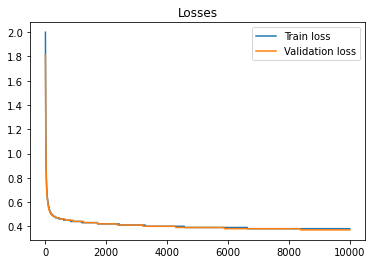

In [ ]:
plt.plot(train_losses, label="Train loss")
plt.plot(validation_losses, label="Validation loss")
plt.legend()
plt.title("Losses")

Text(0.5, 1.0, 'accuracy')

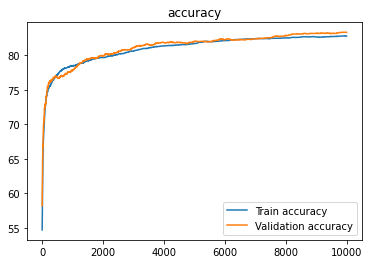

In [ ]:
plt.plot(train_accuracies, label="Train accuracy")
plt.plot(validation_accuracies, label="Validation accuracy")
plt.legend()
plt.title("accuracy")

# Apply on test data

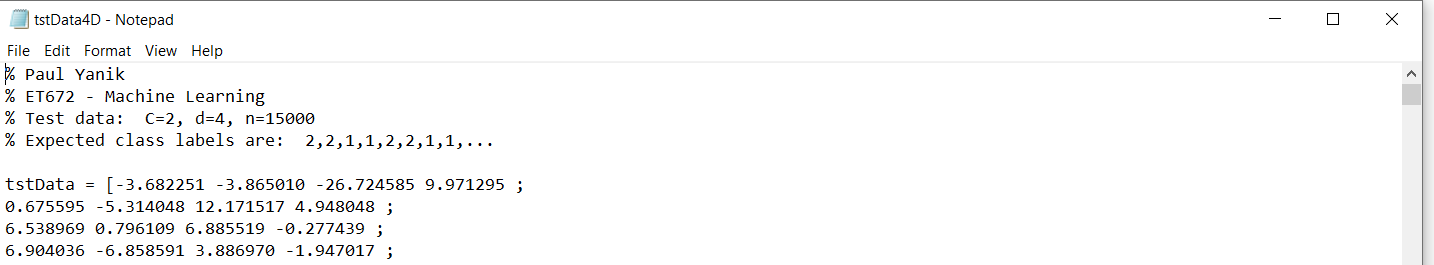

As instructed in the test data matlab file in the figure above, the expected class labels are 2,2,1,1,2,2,1,1,.....This would be in our case 1,1,0,0,1,1,0,0,...Now, we will preprocess the test data the simillar way that we did in case of training data.

In [ ]:
# labeling the data in the described order 2,2,1,1,2,2,1,1,.....('0' for class 1 and '1' for class 2)
test_data['class_name'] = np.asarray([1, 1, 0, 0] * 3750) 
test_data_updated = test_data.sample(frac=1).reset_index(drop=True)
x_test,y_test = test_data_updated.iloc[:, :-1], test_data_updated.iloc[:, [-1]]
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = preprocessing.normalize(x_test)

We checked the accuracy of test data by applying the **get_test_accuracy** method which we created inside the **DeepNeuralNertwork** class. The test accuracy is **83.27 %**.

In [ ]:
dnn.get_test_accuracy(x_test, y_test)

82.9